In [61]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
import pickle

**Data Cleaning**

In [62]:
training_data = pd.read_excel('Flight Dataset/Data.xlsx')
training_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [63]:
training_data['Destination'].value_counts()

Destination
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [64]:
def newd(x):
    if x=='New Delhi':
        return 'Delhi'
    else:
        return x
    
training_data['Destination'] = training_data['Destination'].apply(newd)
training_data['Source'] = training_data['Source'].apply(newd)

In [65]:
training_data['Destination'].value_counts()

Destination
Cochin       4537
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [66]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [67]:
training_data['Journey_day'] = pd.to_datetime(training_data['Date_of_Journey'],format='%d/%m/%Y').dt.day
training_data['Journey_month'] = pd.to_datetime(training_data['Date_of_Journey'],format='%d/%m/%Y').dt.month

training_data.drop('Date_of_Journey',inplace=True,axis=1)

training_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [68]:
training_data['Dep_hour'] = pd.to_datetime(training_data['Dep_Time']).dt.hour
training_data['Dep_min'] = pd.to_datetime(training_data['Dep_Time']).dt.minute
training_data.drop('Dep_Time',axis=1,inplace=True)

training_data['Arrival_hour'] = pd.to_datetime(training_data['Arrival_Time']).dt.hour
training_data['Arrival_min'] = pd.to_datetime(training_data['Arrival_Time']).dt.minute
training_data.drop('Arrival_Time',axis=1,inplace=True)
training_data.head()

/var/folders/t8/cxc5jwsn4sn5ygdzntjkh_180000gp/T/ipykernel_92442/1037086541.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  training_data['Dep_hour'] = pd.to_datetime(training_data['Dep_Time']).dt.hour
/var/folders/t8/cxc5jwsn4sn5ygdzntjkh_180000gp/T/ipykernel_92442/1037086541.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  training_data['Dep_min'] = pd.to_datetime(training_data['Dep_Time']).dt.minute
/var/folders/t8/cxc5jwsn4sn5ygdzntjkh_180000gp/T/ipykernel_92442/1037086541.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  training_data['Arrival_hour'] = pd.to_d

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [69]:
training_data['Duration'].value_counts()

Duration
2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: count, Length: 368, dtype: int64

In [70]:
duration = list(training_data['Duration']) #make the duration column into a list

# parses through the durations, if the duration is a full hour or min number like 2h or 30m
# then, standardize it by turning into 2h 0m or 0h 30m.
for i in range(len(duration)): 
    if len(duration[i].split()) != 2: 
        if 'h' in duration[i]: 
            duration[i] = duration[i] + ' 0m'
        else:
            duration[i] = '0h ' + duration[i]

duration_hour = []
duration_min = []

# splits the duration into two columns: hours and mins
for i in duration:
    h,m = i.split()
    duration_hour.append(int(h[:-1]))
    duration_min.append(int(m[:-1]))

training_data['Duration_hours'] = duration_hour
training_data['Duration_mins'] = duration_min
training_data.drop('Duration',axis=1,inplace=True)
training_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


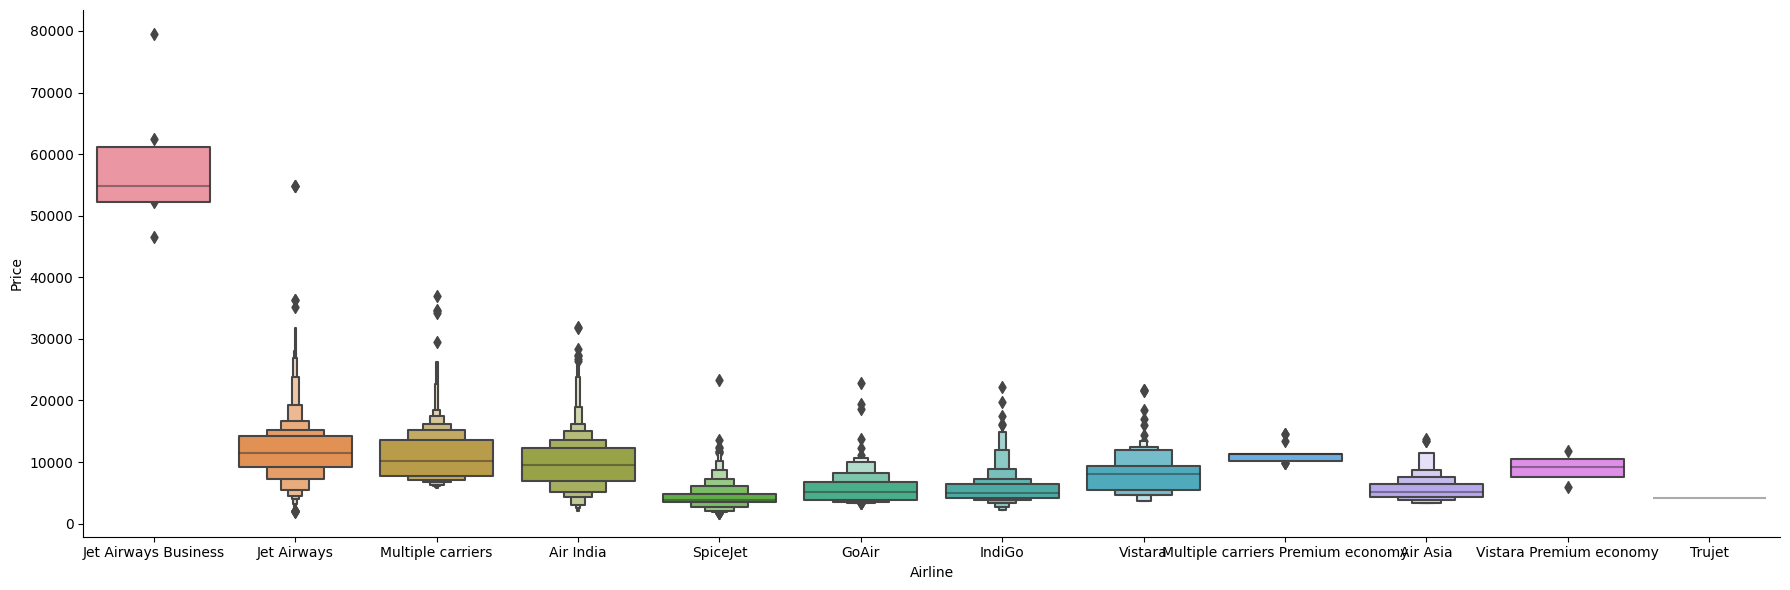

In [71]:
sb.catplot(
    data=training_data.sort_values('Price',ascending=False),
    x='Airline',
    y='Price',
    kind='boxen',
    aspect=3,
    height=6)

# the plot shows that jet airways is the most expensive airways

In [72]:
# making dummy columns of the airline column since it is a catagorical variable
airline = training_data[['Airline']]
airline = pd.get_dummies(airline,drop_first=True)

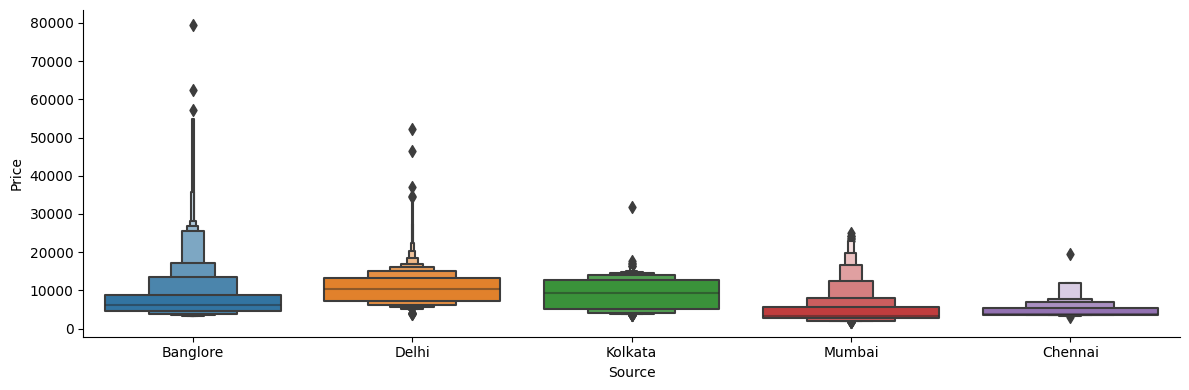

In [73]:
sb.catplot(
    data=training_data.sort_values('Price',ascending=False),
    x='Source',
    y='Price',
    kind='boxen',
    aspect=3,
    height=4)

# the plot shows flights coming out of banglore are the most expensive

In [74]:
source = training_data[['Source']]
source = pd.get_dummies(source,drop_first=True)
source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


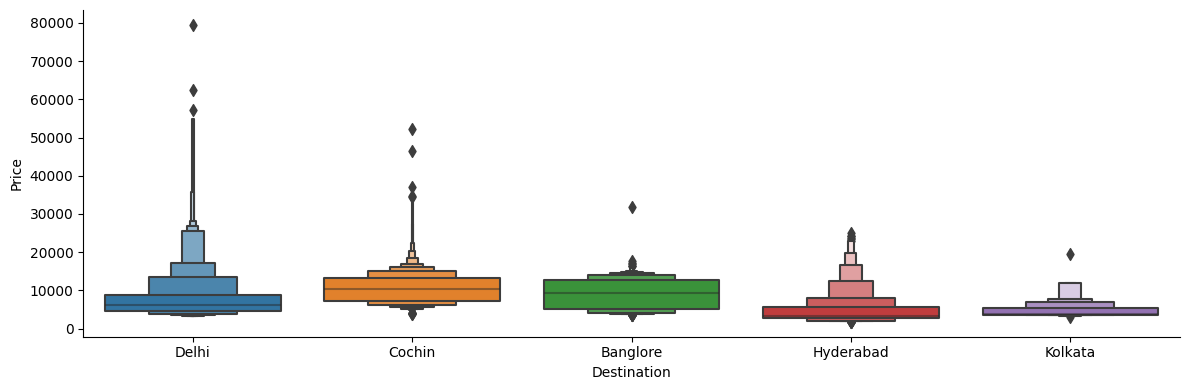

In [75]:
sb.catplot(
    data=training_data.sort_values('Price',ascending=False),
    x='Destination',
    y='Price',
    kind='boxen',
    aspect=3,
    height=4)

# the plot shows flights going to delhi are the most expensive

In [76]:
destination = training_data[['Destination']]
destination = pd.get_dummies(destination,drop_first=True)
destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,False,True,False,False
1,False,False,False,False
2,True,False,False,False
3,False,False,False,False
4,False,True,False,False


In [77]:
# dropping irrlevant columns
training_data.drop(['Route','Additional_Info'],inplace=True,axis=1)

In [78]:
training_data['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [79]:
# converts the stop info column into number labels
training_data['Total_Stops'].replace({
    np.nan: 0,
    'non-stop':0,
    '1 stop':1,
    '2 stops':2,
    '3 stops':3,
    '4 stops':4
    },
    inplace=True
)
training_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,1,13302,1,3,16,50,21,35,4,45


In [80]:
# checking if all 4 data sets are the same length
print(training_data.shape)
print(airline.shape)
print(source.shape)
print(destination.shape)

# they all have the same number of rows

(10683, 13)
(10683, 11)
(10683, 4)
(10683, 4)


In [81]:
cleaned_data = pd.concat([training_data,airline,source,destination],axis=1)
cleaned_data.drop(['Airline','Source','Destination'],axis=1,inplace=True)
cleaned_data.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,3897,24,3,22,20,1,10,2,50,...,False,False,False,False,False,False,False,True,False,False
1,2,7662,1,5,5,50,13,15,7,25,...,False,False,False,False,True,False,False,False,False,False
2,2,13882,9,6,9,25,4,25,19,0,...,False,False,False,True,False,False,True,False,False,False
3,1,6218,12,5,18,5,23,30,5,25,...,False,False,False,False,True,False,False,False,False,False
4,1,13302,1,3,16,50,21,35,4,45,...,False,False,False,False,False,False,False,True,False,False


**Feature Selection**
With the cleaned datat set, we're determining which independent variables are the best and have clear correlation with the dependent variable — price. 

In [82]:
indepVar = cleaned_data.drop('Price',axis=1)
indepVar.head()

# all the info except for price is our independent variables that will impact price, 
# the dependent variable


,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,24,3,22,20,1,10,2,50,False,...,False,False,False,False,False,False,False,True,False,False
1,2,1,5,5,50,13,15,7,25,True,...,False,False,False,False,True,False,False,False,False,False
2,2,9,6,9,25,4,25,19,0,False,...,False,False,False,True,False,False,True,False,False,False
3,1,12,5,18,5,23,30,5,25,False,...,False,False,False,False,True,False,False,False,False,False
4,1,1,3,16,50,21,35,4,45,False,...,False,False,False,False,False,False,False,True,False,False


In [83]:
deptVar = cleaned_data['Price']
deptVar.head()

# price is the target dependent variable

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [84]:
training_data.drop(['Airline','Source','Destination'],axis=1,inplace=True)

Method One: Heatmap

<Axes: >

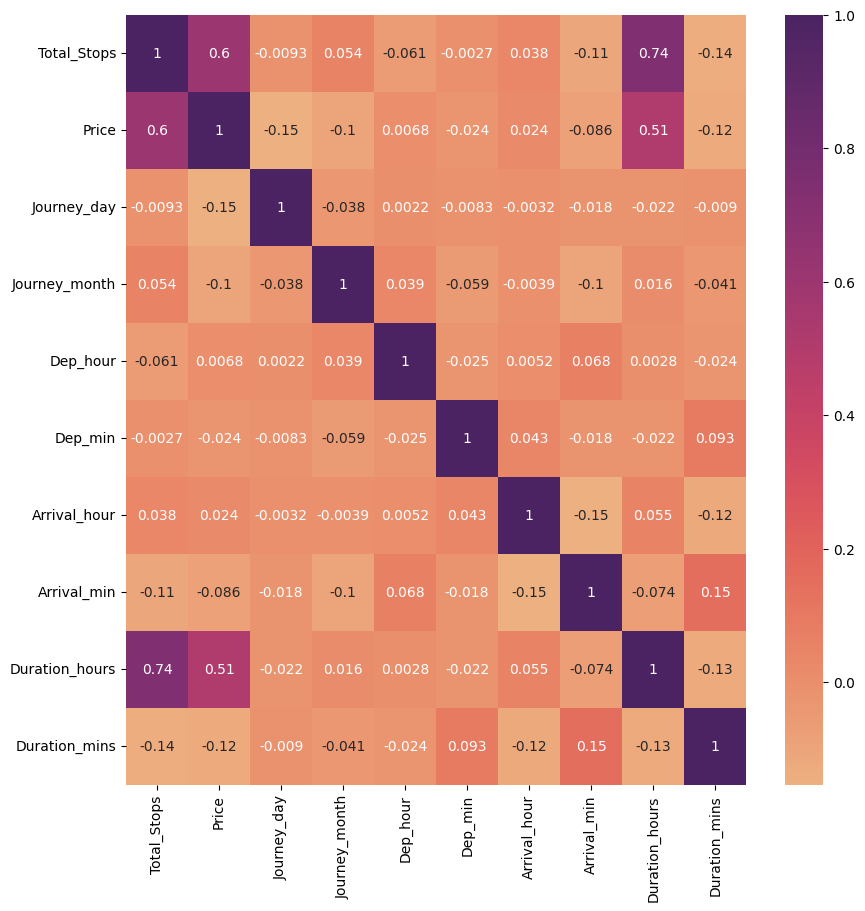

In [85]:
plt.figure(figsize=(10,10))
sb.heatmap(training_data.corr(),cmap='flare',annot=True)

# we can see clearly that the price is highly and positively correlated to total stops and duration time

Method Two: ExtraTreesRegressor and feature_importances_

In [88]:
# fit the data into ExtraTreeRegressor and analyze the feature importances
reg = ExtraTreesRegressor()
reg.fit(indepVar,deptVar)
print(reg.feature_importances_)


[2.42052820e-01 1.41934967e-01 5.74403246e-02 2.45860664e-02
 2.09754736e-02 2.81941033e-02 1.93204021e-02 1.16703224e-01
 1.76985646e-02 9.75814829e-03 2.13093966e-03 1.74747703e-02
 1.40883985e-01 6.76774809e-02 1.75463492e-02 8.29719032e-04
 5.54965595e-03 9.70228574e-05 4.67285441e-03 6.54761305e-05
 6.00175676e-04 1.04860958e-02 5.12273343e-03 1.04066774e-02
 9.89026236e-03 1.91685180e-02 7.93744964e-03 7.95740024e-04]


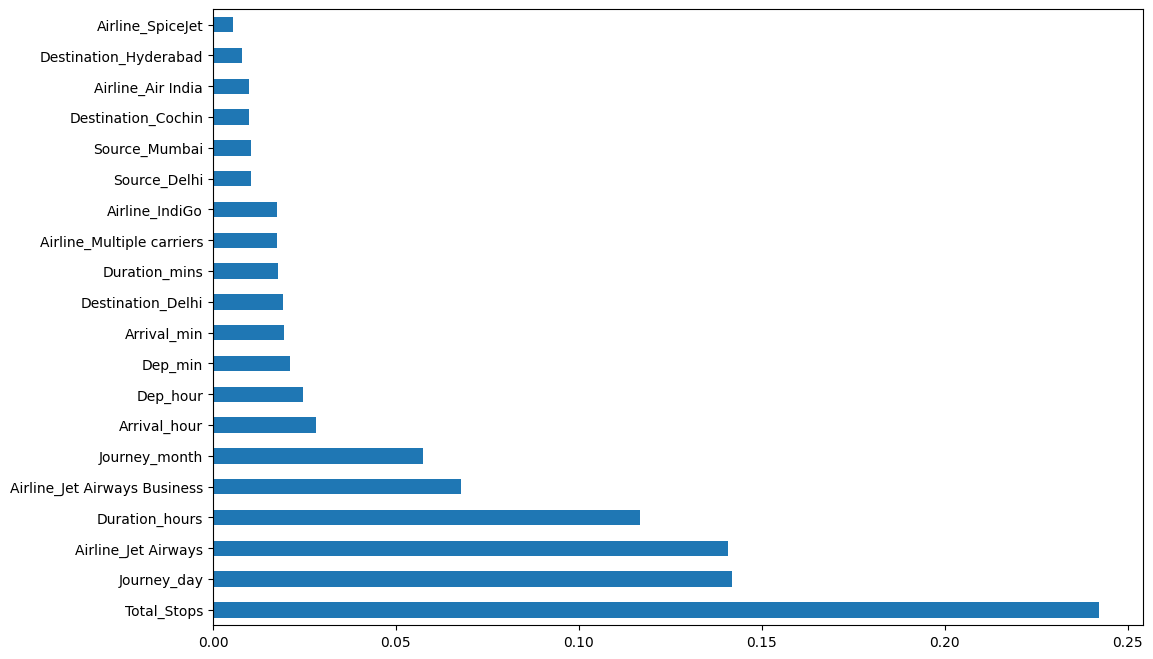

In [91]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(reg.feature_importances_, index=indepVar.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# the plot shows that total stops, journey day, and duration hours are the most important 
# determining variables of price

**Training and fitting the model using Random Forest**

In [97]:
X_train, X_test, y_train, y_test = train_test_split(indepVar, deptVar, test_size=0.2, random_state=42)

In [101]:
# training the Random Forest Regressor model for Flight Price Prediction

# number of decision trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# number of features to consider at every split
max_features = [None, 'sqrt']

# max number of levels in each decision tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# min number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# min number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf}

# random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(
    estimator = RandomForestRegressor(), 
    param_distributions = random_grid,
    scoring='neg_mean_squared_error', 
    n_iter = 10, 
    cv = 5, 
    verbose=1, 
    random_state=42,
    n_jobs = 1)

rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': [None, 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [102]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': None,
 'max_depth': 20}

In [103]:
# Flight Price Prediction
prediction = rf_random.predict(X_test)

<Figure size 800x800 with 0 Axes>

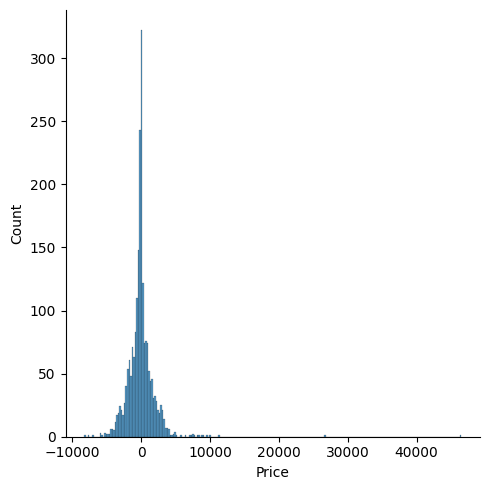

In [105]:
plt.figure(figsize = (8,8))
sb.displot(y_test-prediction)
plt.show()

# the plot shows that most of the residuals are 0, which means the model is generalizing well

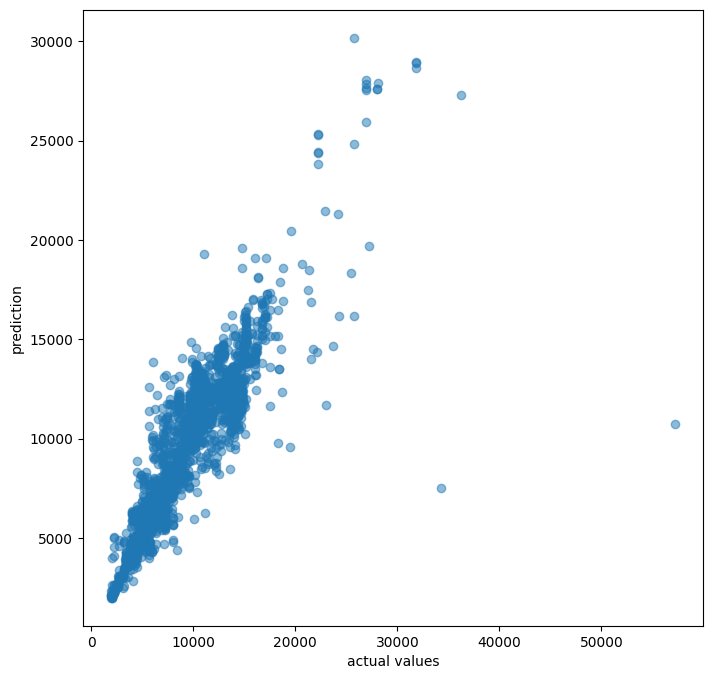

In [106]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("actual values")
plt.ylabel("prediction")
plt.show()

In [107]:
# the r2 score
print('r2 score: ', metrics.r2_score(y_test,prediction))

r2 score:  0.8013880879675644


**Saving the Model**

In [108]:
file = open('flight_rf.pkl', 'wb')
pickle.dump(rf_random, file)